<a href="https://colab.research.google.com/github/Thorne-Musau/Internsavy3/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!ls 'drive/My Drive/Dataset/Mall_Customers.csv'

'drive/My Drive/Dataset/Mall_Customers.csv'


In [17]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

plt.style.use("Solarize_Light2")
import warnings
warnings.filterwarnings("ignore")

In [18]:
#Importing the datasets
%time dataset = pd.read_csv('drive/My Drive/Dataset/Mall_Customers.csv')
df = dataset.copy()

CPU times: user 2.73 ms, sys: 968 µs, total: 3.7 ms
Wall time: 6.71 ms


In [19]:
# Getting the insides of the data
df.isnull().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
# Dropping cutomerID and gender column
df.drop(["CustomerID", "Gender"], axis="columns", inplace=True)

In [23]:
# Customer age segmaentation

In [24]:
# Dataset with only age and spemding column
X = df[["Age", "Spending Score (1-100)"]].iloc[: , :].values

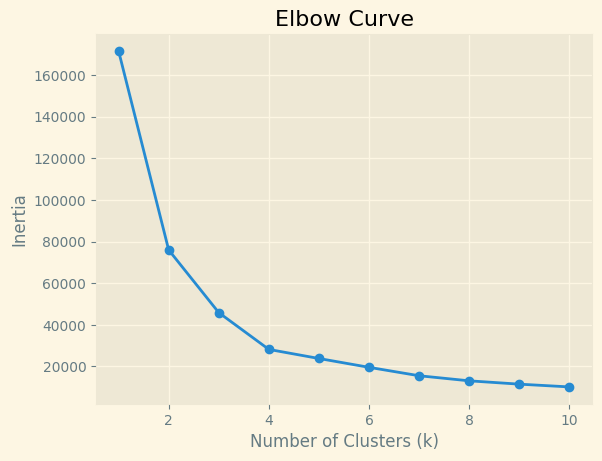

In [25]:
# Best cluster for age segmentation usng K-means method
max_k = 10
inertia = []
k_values = range(1, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [26]:
# Tuning to fit within the three best-fit clusters
kmeans = KMeans(n_clusters = 3 ,max_iter=1000, tol=.00001,  random_state= 64  , algorithm='elkan')
kmeans.fit(X)

KMeans(algorithm='elkan', max_iter=1000, n_clusters=3, random_state=64,
       tol=1e-05)

WCSS: 45840.67661610867


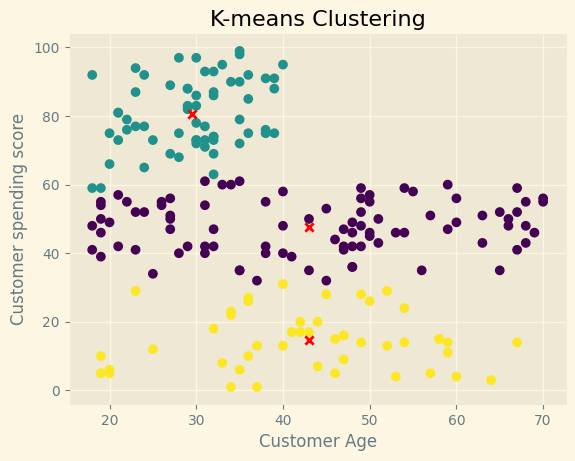

In [27]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

distances = [np.linalg.norm(X[i] - centroids[labels[i]]) for i in range(len(X))]
wcss = np.sum(np.square(distances))

print("WCSS:", wcss)

plt.scatter(X[:, 0], X[:, 1], c= kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel('Customer Age')
plt.ylabel('Customer spending score')
plt.title('K-means Clustering')
plt.show()

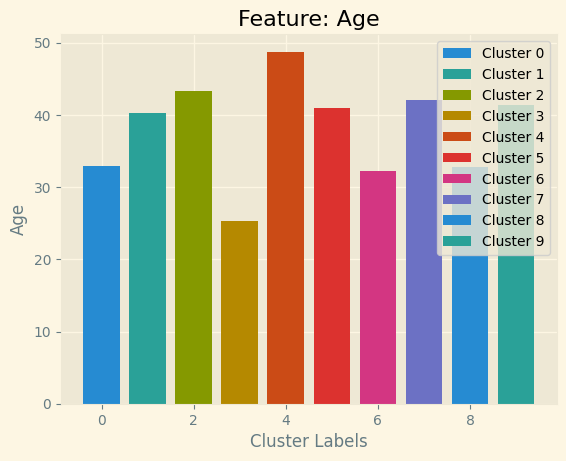

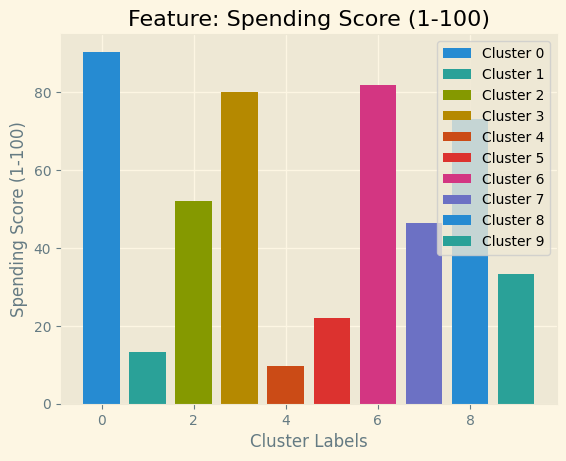

In [36]:
cluster_labels = kmeans.labels_

df1 = df.drop(["Annual Income (k$)"], axis="columns")
df1['cluster_labels'] = cluster_labels

cluster_profiles = df1.groupby('cluster_labels').mean()

for feature in cluster_profiles.columns:
    plt.figure()
    for cluster_label, profile in cluster_profiles.iterrows():
        plt.bar(cluster_label, profile[feature], label=f'Cluster {cluster_label}')
    plt.xlabel('Cluster Labels')
    plt.ylabel(feature)
    plt.title(f'Feature: {feature}')
    plt.legend()
    plt.show()

In [29]:
# Customer Income segmentation

In [30]:
#We do the same for income segmentation
# Create a dataset that has only the Customer annual income and spending score
X2 = df[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[: , :].values

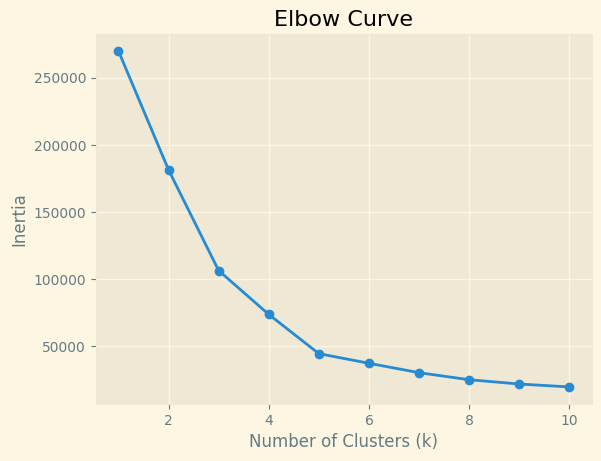

In [31]:
# Best fit clusters using K-means
max_k = 10
inertia = []
k_values = range(1, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

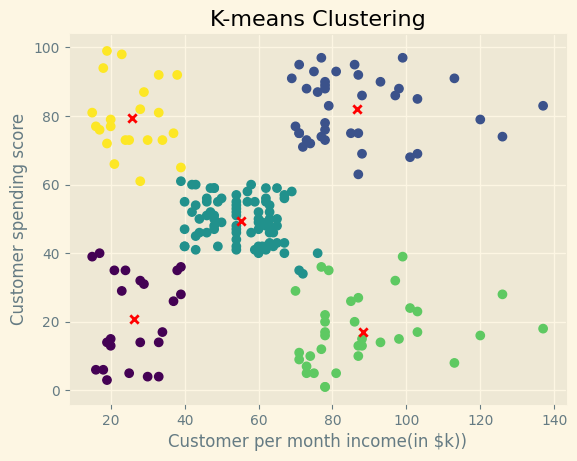

In [32]:
#Tuning and visualizing
kmeans_2 = KMeans(n_clusters = 5 ,max_iter=1000, tol=.000001,  random_state= 64, algorithm="full")
kmeans_2.fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], c= kmeans_2.labels_, cmap='viridis')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel('Customer per month income')
plt.ylabel('Customer spending score')
plt.title('K-means Clustering')
plt.show()

WCSS: 44448.45544793371


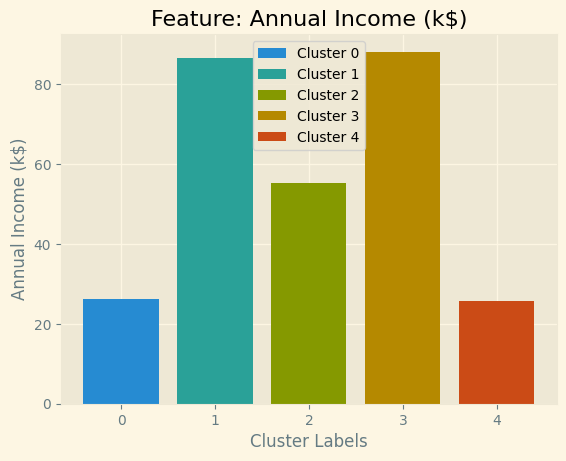

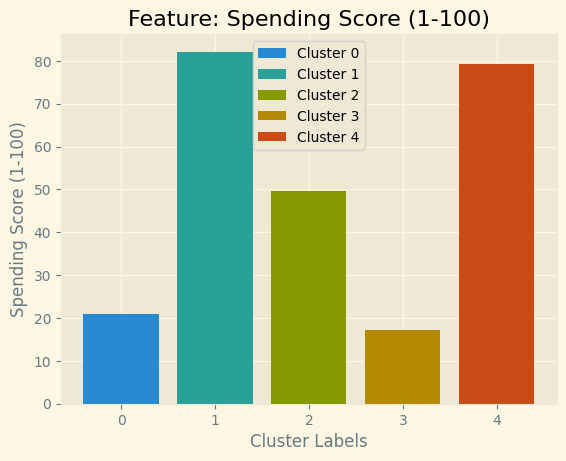

In [33]:
# Adding lables to the clusters

centroids = kmeans_2.cluster_centers_
labels = kmeans_2.labels_

distances = [np.linalg.norm(X2[i] - centroids[labels[i]]) for i in range(len(X2))]
wcss = np.sum(np.square(distances))

print("WCSS:", wcss)
cluster_labels = kmeans_2.labels_

df2 = df.drop(["Age"], axis="columns")
df2['cluster_labels'] = cluster_labels

cluster_profiles = df2.groupby('cluster_labels').mean()

for feature in cluster_profiles.columns:
    plt.figure()
    for cluster_label, profile in cluster_profiles.iterrows():
        plt.bar(cluster_label, profile[feature], label=f'Cluster {cluster_label}')
    plt.xlabel('Cluster Labels')
    plt.ylabel(feature)
    plt.title(f'Feature: {feature}')
    plt.legend()
    plt.show()